In [16]:
'''
The following code for downloading, importing and displaying the Fashion MNIST dataset is adapted
from ChatGPT, accessed February 27, 2024
'''
import numpy as np
import matplotlib.pyplot as plt
import random
import requests
import gzip
import os

def download_fashion_mnist(url, file_name):
    # Check if file already exists
    if not os.path.exists(file_name):
        # Download the file
        r = requests.get(url)
        with open(file_name, 'wb') as f:
            f.write(r.content)

def load_fashion_mnist(image_file, label_file):
    # Read image file
    with gzip.open(image_file, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

    # Read label file
    with gzip.open(label_file, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return images, labels

# URLs for Fashion MNIST dataset
image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'

# File names to save the downloaded files
image_file = 'train-images-idx3-ubyte.gz'
label_file = 'train-labels-idx1-ubyte.gz'

# Download Fashion MNIST dataset
download_fashion_mnist(image_url, image_file)
download_fashion_mnist(label_url, label_file)

# Load Fashion MNIST dataset
train_images, train_labels = load_fashion_mnist(image_file, label_file)

# URLs for Fashion MNIST test dataset
test_image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
test_label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

# File names to save the downloaded files for test dataset
test_image_file = 't10k-images-idx3-ubyte.gz'
test_label_file = 't10k-labels-idx1-ubyte.gz'

# Download Fashion MNIST dataset
download_fashion_mnist(test_image_url, test_image_file)
download_fashion_mnist(test_label_url, test_label_file)

# Load Fashion MNIST dataset
test_images, test_labels = load_fashion_mnist(test_image_file, test_label_file)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


60000 Images belong to the: training set
	Count of Ankle boot images in training set: 6000
	Count of T-shirt/top images in training set: 6000
	Count of Dress images in training set: 6000
	Count of Pullover images in training set: 6000
	Count of Sneaker images in training set: 6000
	Count of Sandal images in training set: 6000
	Count of Trouser images in training set: 6000
	Count of Shirt images in training set: 6000
	Count of Coat images in training set: 6000
	Count of Bag images in training set: 6000

10000 Images belong to the: testing set
	Count of Ankle boot images in training set: 1000
	Count of Pullover images in training set: 1000
	Count of Trouser images in training set: 1000
	Count of Shirt images in training set: 1000
	Count of Coat images in training set: 1000
	Count of Sandal images in training set: 1000
	Count of Sneaker images in training set: 1000
	Count of Dress images in training set: 1000
	Count of Bag images in training set: 1000
	Count of T-shirt/top images in train

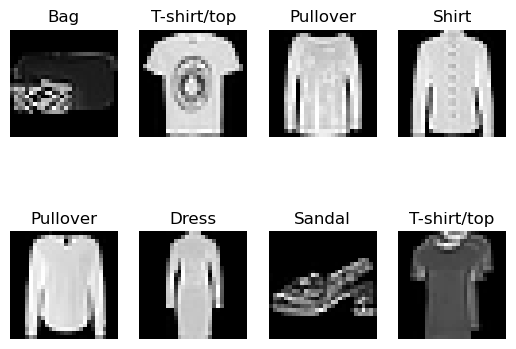

In [17]:
from collections import Counter
# Display a random seletion of training images
count = 0
for i in random.choices(range(len(train_images)),k=8):
    img = train_images[i]
    plt.subplot(2, 4, count+1)
    plt.title(class_names[int(train_labels[i])])
    plt.axis("off")
    plt.imshow(train_images[i], cmap='gray')
    count += 1

# Output statistics indicating how many images belong to each class
print(f"{len(train_labels)} Images belong to the: training set")
for i, count in Counter(train_labels).items():
    print(f"\tCount of {class_names[i]} images in training set: {count}")

print(f"\n{len(test_labels)} Images belong to the: testing set")
for i, count in Counter(test_labels).items():
    print(f"\tCount of {class_names[i]} images in training set: {count}")

In [18]:
# Normalize images
def normalize_images(images):   
    out_data = []
    for img in images:
        vec = img.ravel()
        norm_vec = (vec - np.mean(vec)) / np.std(vec)
        out_data.append(norm_vec)
    return out_data

train_data = normalize_images(train_images)
test_data = normalize_images(test_images)

In [19]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

sample = knn.predict(test_data[:25])

for i in range(25):
    pred, label = sample[i], test_labels[i]
    print(f"Sample {i}:\t nearest-neighbor class: {pred}"
          f",\t correct class:{label}")

Sample 0:	 nearest-neighbor class: 9,	 correct class:9
Sample 1:	 nearest-neighbor class: 2,	 correct class:2
Sample 2:	 nearest-neighbor class: 1,	 correct class:1
Sample 3:	 nearest-neighbor class: 1,	 correct class:1
Sample 4:	 nearest-neighbor class: 0,	 correct class:6
Sample 5:	 nearest-neighbor class: 1,	 correct class:1
Sample 6:	 nearest-neighbor class: 4,	 correct class:4
Sample 7:	 nearest-neighbor class: 6,	 correct class:6
Sample 8:	 nearest-neighbor class: 5,	 correct class:5
Sample 9:	 nearest-neighbor class: 7,	 correct class:7
Sample 10:	 nearest-neighbor class: 4,	 correct class:4
Sample 11:	 nearest-neighbor class: 9,	 correct class:5
Sample 12:	 nearest-neighbor class: 5,	 correct class:7
Sample 13:	 nearest-neighbor class: 3,	 correct class:3
Sample 14:	 nearest-neighbor class: 4,	 correct class:4
Sample 15:	 nearest-neighbor class: 1,	 correct class:1
Sample 16:	 nearest-neighbor class: 2,	 correct class:2
Sample 17:	 nearest-neighbor class: 6,	 correct class:4
Sa

In [20]:
# Error Metrics
from sklearn.metrics import confusion_matrix

def compute_accuracy(test_pairs, num_classes):
    pred, label = zip(*test_pairs)
    num_correct = 0

    for i in range(len(test_pairs)):
        if pred[i] == label[i]:
            num_correct += 1

    return num_correct / len(test_pairs)


def compute_per_class_accuracy(test_pairs, num_classes):
    pred, label = zip(*test_pairs)
    counts_per = np.zeros(num_classes)
    num_correct = np.zeros(num_classes)

    for i in range(len(test_pairs)):
        counts_per[label[i]] += 1
        if pred[i] == label[i]:
            num_correct[label[i]] += 1
    
    return num_correct / counts_per
    

def compute_confusion_matrix(test_pairs, num_classes):
    pred, label = zip(*test_pairs)
    return confusion_matrix(pred, label)

In [21]:
from sklearn.model_selection import train_test_split

# Create validation set of 1000 from training
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=(1/60), random_state=1) # 1/60 * 60000 = 1000

# Defne k-NN classifer and tune hyper parameters
def evaluate_hyperparams(X_train, X_val, y_train, y_val, params):
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_val, y_val)

    print(f"Hyperparameter combination: {params}")
    print(f'Validation accuracy: {accuracy:.2f}\n')
    return knn, accuracy

hyperparameters = [
    {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30, 'p': 2},
    {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 40, 'p': 1},
    {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 2},
    {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 30, 'p': 1},
    {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 50, 'p': 2},
    {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 30, 'p': 2},
    {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 40, 'p': 1},
    {'n_neighbors': 11, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 20, 'p': 2},
    {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 60, 'p': 1},
    {'n_neighbors': 12, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 35, 'p': 2}
]

best_model = None
best_params = None
best_accuracy = 0

for params in hyperparameters:
    model, accuracy = evaluate_hyperparams(X_train, X_val, y_train, y_val, params)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model = model

print("Best model hyperparameters:", best_params)
print(f"Best model accuracy: {best_accuracy:.2f}")

Hyperparameter combination: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30, 'p': 2}
Validation accuracy: 0.84

Hyperparameter combination: {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 40, 'p': 1}
Validation accuracy: 0.86

Hyperparameter combination: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 2}
Validation accuracy: 0.84

Hyperparameter combination: {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 30, 'p': 1}
Validation accuracy: 0.86

Hyperparameter combination: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 50, 'p': 2}
Validation accuracy: 0.85

Hyperparameter combination: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 30, 'p': 2}
Validation accuracy: 0.84

Hyperparameter combination: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 40, 'p': 1}
Validation a

In [22]:
# Apply Final Test

# Train on all 60,000 training data
best_model.fit(train_data, train_labels)
preds = best_model.predict(test_data)

# Compute accuracy on test data
num_classes = 10
pairs = list(zip(preds, test_labels))
accuracy = compute_accuracy(pairs, num_classes)
print(f'accuracy: {accuracy:.2f}')

per_class_accuracy = compute_per_class_accuracy(pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{class_names[i]}: {acc:4.2f}')

cm = compute_confusion_matrix(pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()


accuracy: 0.87

Per class accuracy
T-shirt/top: 0.89
Trouser: 0.98
Pullover: 0.81
Dress: 0.89
Coat: 0.77
Sandal: 0.92
Shirt: 0.52
Sneaker: 0.97
Bag: 0.96
Ankle boot: 0.95

Confusion matrix
 0: 888  1 20 36  2  0 212  0  3  1
 1:  4 977  1 13  0  0  1  0  2  0
 2: 20  0 814 10 150  0 129  0 10  0
 3: 17 12  9 886 24  0 23  0  3  0
 4:  7  4 90 35 773  0 101  0  6  0
 5:  0  0  0  0  0 916  0  4  0  2
 6: 55  5 64 16 48  0 522  0  8  0
 7:  1  0  0  0  0 50  0 969  8 42
 8:  8  1  2  4  3  1 12  0 957  0
 9:  0  0  0  0  0 33  0 27  3 955


# Discussion

### Easiest & Hardest to Recognize Classes:
Trouser (0.97), Bag (0.97), and Ankle boot (0.97) show the highest per-class accuracy. These classes are distinctly different from others in terms of shape and texture, which likely contributes to the high accuracy.
Shirt (0.57) stands out as the most challenging class. This might be due to the similarity in appearance with other clothing items like T-shirts, pullovers, and coats, leading to higher confusion.
### Most Confused Classes
The confusion matrix highlights significant confusion between:
Shirts and T-shirts/tops: 182 instances of shirts were misclassified as T-shirts/tops.
Coats and Pullovers: 115 instances of coats were misclassified as pullovers, likely due to similar textures and shapes.
Shirts and Coats: 52 instances of shirts misclassified as coats, which again points to visual similarities.
### Surprising Aspects
It's surprising to see a very high accuracy for classes like trousers, bags, and ankle boots, almost reaching 97%. This indicates that the model is very effective at distinguishing their unique features.
The low accuracy for shirts is notably surprising and suggests that the feature space for shirts overlaps significantly with other categories, making it difficult for the model to distinguish them accurately.

Another aspect that suprised me was the difference in running speed between hyperparameter combinations. Some would complete in seconds while others would take minutes for not that big a change.
### Important Parameter Settings
n_neighbors: 4 - I found that having a relatively small number of neighbors had the biggest impact in producing a decision with the highest accuracy.



In [23]:
# Tuning with PCA
from sklearn.decomposition import PCA

# Define k-NN classifer and tune hyper parameters
def evaluate_hyperparams_PCA(X_train, X_val, y_train, y_val, params, m_value):
    pca = PCA(n_components=m_value)
    pca.fit(X_train)
    X_val_pca = pca.transform(X_val)
    X_train_pca = pca.transform(X_train)

    knn = KNeighborsClassifier(**params)
    knn.fit(X_train_pca, y_train)
    accuracy = knn.score(X_val_pca, y_val)

    print(f"Hyperparameter combination: {params}")
    print(f"M-value: {m_value}")
    print(f'Validation accuracy: {accuracy:.2f}\n')
    return knn, accuracy, m_value

hyperparameters = [
    {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30, 'p': 2},
    {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 40, 'p': 1},
    {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 2},
    {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 30, 'p': 1},
    {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 50, 'p': 2},
    {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 30, 'p': 2},
    {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 40, 'p': 1},
    {'n_neighbors': 11, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 20, 'p': 2},
    {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 60, 'p': 1},
    {'n_neighbors': 12, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 35, 'p': 2}
]

m_values = [35, 40, 55, 65, 75, 85, 100, 115, 125, 135]

best_model_PCA = None
best_params = None
best_accuracy = 0
best_m_value = 0

for params, m_value in zip(hyperparameters, m_values):
    model, accuracy, m_value = evaluate_hyperparams_PCA(X_train, X_val, y_train, y_val, params, m_value)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model_PCA = model
        best_m_value = m_value

print("Best model hyperparameters:", best_params)
print("Best model m-value:", m_value)
print(f"Best model accuracy: {best_accuracy:.2f}\n")


Hyperparameter combination: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30, 'p': 2}
M-value: 35
Validation accuracy: 0.86

Hyperparameter combination: {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 40, 'p': 1}
M-value: 40
Validation accuracy: 0.86

Hyperparameter combination: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 20, 'p': 2}
M-value: 55
Validation accuracy: 0.85

Hyperparameter combination: {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 30, 'p': 1}
M-value: 65
Validation accuracy: 0.86

Hyperparameter combination: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 50, 'p': 2}
M-value: 75
Validation accuracy: 0.87

Hyperparameter combination: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 30, 'p': 2}
M-value: 85
Validation accuracy: 0.86

Hyperparameter combination: {'n_neighbors': 4, 'weights': 

In [24]:
# Final Test PCA
best_pca = PCA(n_components=best_m_value)
best_pca.fit(train_data)
X_test_pca = best_pca.transform(test_data)
X_train_pca = best_pca.transform(X_train)

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_pca, y_train)
preds = best_knn.predict(X_test_pca)

num_classes = 10
pairs = list(zip(preds, test_labels))
accuracy = compute_accuracy(pairs, num_classes)
print(f'accuracy: {accuracy:.2f}')

per_class_accuracy = compute_per_class_accuracy(pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{class_names[i]}: {acc:4.2f}')

cm = compute_confusion_matrix(pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 0.87

Per class accuracy
T-shirt/top: 0.87
Trouser: 0.97
Pullover: 0.79
Dress: 0.89
Coat: 0.82
Sandal: 0.90
Shirt: 0.56
Sneaker: 0.96
Bag: 0.98
Ankle boot: 0.96

Confusion matrix
 0: 873  6 22 34  4  0 189  0  0  0
 1:  0 973  4  9  0  0  0  0  0  0
 2: 16  0 792 11 111  0 109  0  6  0
 3: 13 14  8 888 24  0 19  0  4  0
 4:  5  2 108 30 820  0 106  0  4  0
 5:  2  0  0  0  0 896  0  6  0  1
 6: 81  4 64 23 37  0 562  0  2  0
 7:  0  0  0  0  0 54  0 963  4 39
 8: 10  1  2  5  4  0 15  0 978  1
 9:  0  0  0  0  0 50  0 31  2 959


In [25]:
'''
Test code for error metrics. Leave this unchanged.
'''
test_pairs = [
    (1, 1),
    (1, 4),
    (0, 0),
    (0, 2),
    (3, 1),
    (4, 2),
    (4, 4),
    (2, 2),
    (2, 2),
    (3, 3),
    (4, 0),
    (4, 4),
    (1, 1),
    (0, 0),
    (0, 2),
    (1, 4),
    (1, 1),
    (0, 0),
    (0, 1),
    (2, 3),
]

num_classes = 5
accuracy = compute_accuracy(test_pairs, num_classes)
print(f'accuracy: {accuracy:.2f}')

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 0.55

Per class accuracy
0: 0.75
1: 0.60
2: 0.40
3: 0.50
4: 0.50

Confusion matrix
 0:  3  1  2  0  0
 1:  0  3  0  0  2
 2:  0  0  2  1  0
 3:  0  1  0  1  0
 4:  1  0  1  0  2
